<a href="https://colab.research.google.com/github/ManojKesani/100-Days-Of-ML-Code/blob/master/GD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
X = np.array([0.5,2.3,2.9])
Y = np.array([1.4,1.9,3.2])
x_tick = np.arange(0,5,0.01)

In [ ]:
def fun(x,m,c):
  # print('hi')
  y = m*x+c

  return y

y_l = fun(x_tick,0.64,1)

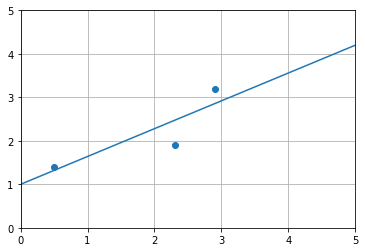

In [ ]:
plt.scatter(X,Y)
plt.plot(x_tick,y_l)
plt.xlim(0,5)
plt.ylim(0,5)
plt.grid()

In [199]:
m = 0.5
e_y = []
e_x = np.arange(-5,8,0.1)
for c in e_x :
  # c = 1
  loss = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    loss += (y1-y)**2

  e_y.append(loss)

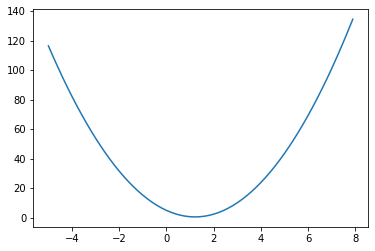

In [200]:
plt.plot(e_x,e_y)
# e_y

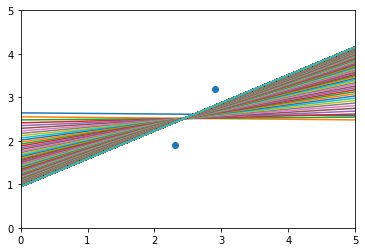

In [209]:
m = 0.5
c = 3
lr = 0.1

def loss_fun(X,Y,m,c):
  l = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    l += (y1-y)**2

  return l/X.shape[0]


def dloss_fun_C(X,Y,m,c):
  s = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    s += 2*(y1-y)
  return s/X.shape[0]

def dloss_fun_M(X,Y,m,c):
  s = 0
  for x,y in zip(X,Y):
    y1 = fun(x,m,c)
    s += 2*(y1-y)*x
  return s/X.shape[0]

l = []
e = []
ap_C = []
for i in range(500):
  # print('hi')
  ap_C.append(c)
  e.append(loss_fun(X,Y,m,c))

  loss = loss_fun(X,Y,m,c)
  step_C = lr*dloss_fun_C(X,Y,m,c)
  c = c - step_C


  step_M = lr*dloss_fun_M(X,Y,m,c)
  m = m - step_M

  l.append(loss)
  x_tick = np.arange(0,5,0.01)
  y_l = fun(x_tick,m,c)
  plt.plot(x_tick,y_l)
  
  plt.xlim(0,5)
  plt.ylim(0,5)
  plt.grid()

plt.scatter(X,Y)

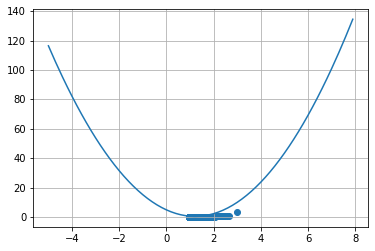

In [210]:
# plt.plot(np.arange(0,50),l)
plt.plot(e_x,e_y)
plt.scatter(ap_C,e)
plt.grid()

In [211]:
m,c

(0.6410256409152196, 0.9487179489872504)

In [212]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:, np.newaxis], Y)
print(model.coef_,model.intercept_)

[0.64102564] 0.9487179487179487


In [213]:
import pandas as pd
df_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [214]:
X_train = df_train['median_income'].values
Y_train = df_train['median_house_value'].values

X_test = df_test['median_income'].values
Y_test = df_test['median_house_value'].values

In [236]:
%%time
m = 46843
c = 21034
lr = 0.05

train_loss = []
test_loss = []
loop = np.arange(0,1000)
for _ in loop:
  loss = loss_fun(X_train,Y_train,m,c)
  train_loss.append(loss)

  step_C = lr*dloss_fun_C(X_train,Y_train,m,c)
  c -= step_C

  step_M = lr*dloss_fun_M(X_train,Y_train,m,c)
  m-= step_M

  test_loss.append(loss_fun(X_test,Y_test,m,c))


CPU times: user 1min 3s, sys: 6.63 ms, total: 1min 3s
Wall time: 1min 3s


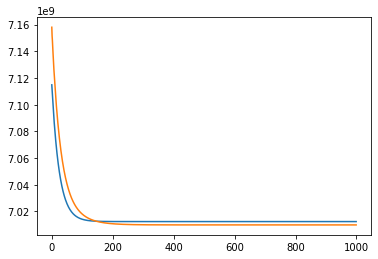

In [237]:
plt.plot(loop,train_loss)
plt.plot(loop,test_loss)

In [238]:
m,c

(42054.07488044669, 43980.62812519101)

In [239]:
%%time
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X_train[:, np.newaxis], Y_train)
print(model.coef_,model.intercept_)

[42054.07487406] 43980.62815629659
CPU times: user 5.22 ms, sys: 962 µs, total: 6.19 ms
Wall time: 7.61 ms
